# Importing Libraries and loading the dataset

1. `matplotlib.pyplot`: This module provides a MATLAB-like plotting framework in Python. It is commonly used for creating various types of plots, charts, and visualizations.


2. `nltk` (Natural Language Toolkit): It is a Python library used for natural language processing (NLP) tasks such as <span style ="color:red">tokenization, stemming, tagging, parsing, semantic reasoning, and more.</span>


3. `numpy` (Numerical Python): It is a popular Python library for scientific computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

4. `re` (Regular Expressions): This module provides support for regular expressions in Python. It allows you to work with<span style ="color:red">patterns and perform pattern matching, search, and substitution operations in strings.</span> 


5. `pandas`: It is a powerful data manipulation and analysis library for Python. It provides data structures like  DataFrame for efficient data handling, manipulation, and analysis.

6. `string`: This module provides a collection of common string operations in Python. It includes various constants and functions for working with strings, such as string formatting, manipulation, and character set operations.


7. `seaborn`: It is a data visualization library based on matplotlib. Seaborn provides a high-level interface for creating <span style ="color:red">informative and attractive statistical graphics.</span>


8. `nltk.corpus.stopwords`: It is a module in NLTK that provides a list of <span style ="color:red">commonly occurring words that are often considered insignificant and can be ignored in text analysis.</span>  These words, known as "stop words," are typically removed to focus on more meaningful content.


9. `nltk.stem.lancaster`: This module in NLTK implements the Lancaster stemming algorithm, which is an aggressive stemming algorithm used to reduce words to their base or root form. It aims to <span style ="color:red">remove prefixes and suffixes</span> from words.


10. `sklearn.feature_extraction.text.CountVectorizer`: It is a module from the scikit-learn library that <span style ="color:red">converts a collection of text documents into a matrix of token counts.</span>  It creates a document-term matrix where each row represents a document and each column represents a word, with the values indicating the frequency of each word in each document.


11. `sklearn.feature_extraction.text.TfidfVectorizer`: It is another module from scikit-learn that <span style ="color:red">onverts a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.</span> c TF-IDF reflects the importance of a word in a document relative to the entire corpus.

These modules are commonly used in text processing, analysis, and visualization tasks.

In [4]:
# Import the packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns
# Remove useless words
from nltk.corpus import stopwords  
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

print(stopwords_list[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the dataset and checking the first 5 rows

In [7]:
data = pd.read_csv('data.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Checking the 1st two comments.

In [8]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

# Check percentage of comments that are toxic compared to normal comments
calculates the value counts of the "toxic" column in a DataFrame called data and normalizes the counts to obtain the relative frequencies or proportions of each unique value.

In [10]:
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [11]:
data.identity_hate.value_counts(normalize=True)

0    0.991195
1    0.008805
Name: identity_hate, dtype: float64

# Data analysis

In [12]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Create a new subset of the data by only taking the 2nd column onwards
The : in the first position indicates that we want to select all rows in the DataFrame. The 2: in the second position indicates that we want to select columns starting from index 2 onwards.

In [13]:
data_count=data.iloc[:,2:].sum()

In [14]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

# plotting a chart

C:\Users\prave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


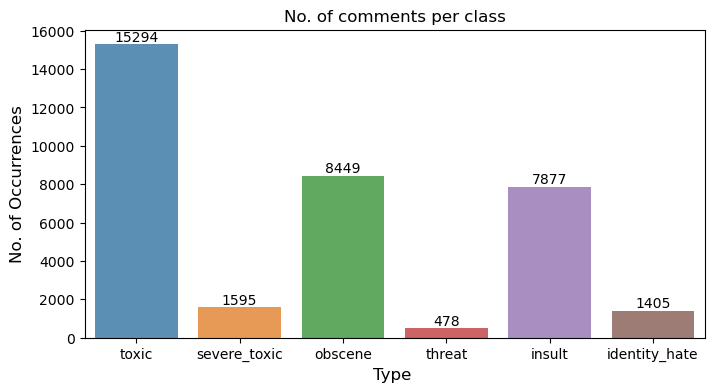

In [15]:
plt.figure(figsize=(8,4))

# This parameter sets the transparency (alpha) level of the bars.
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [16]:
#checking the no of rows.
num_rows = len(data)
print(num_rows)

159571


# Creating a bar graph

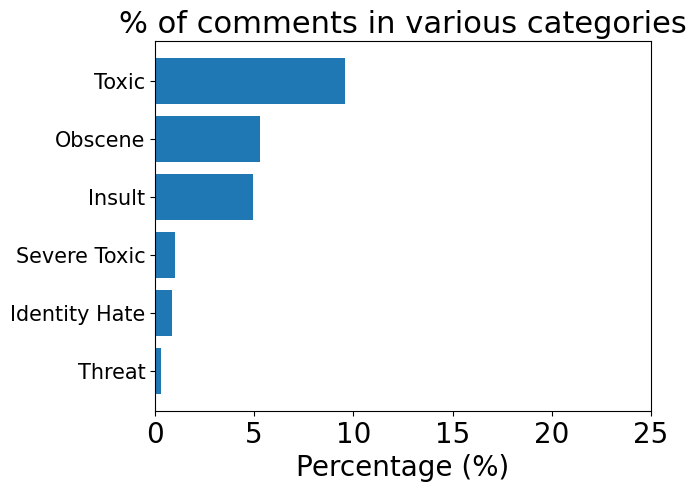

In [17]:
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

# Text preprocessing steps - remove numbers, capital letters, punctuation

In [18]:
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
# re.sub() function from the re module to substitute occurrences of punctuation marks in the lowercased string with a space (' ').
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

# Separate our dataset into 6 sections. Each section is comment and a category.

In [19]:
data_tox = data.loc[:,['id','comment_text','toxic']]

In [20]:
data_tox['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [21]:
data_tox['comment_text'][0:5]

0    explanation why the edits made under my userna...
1    d aww  he matches this background colour i m s...
2    hey man  i m really not trying to edit war  it...
3      more i can t make any real suggestions on im...
4    you  sir  are my hero  any chance you remember...
Name: comment_text, dtype: object

In [22]:
data_sev = data.loc[:,['id','comment_text','severe_toxic']]

In [23]:
data_obs = data.loc[:,['id','comment_text','obscene']]

In [24]:
data_thr = data.loc[:,['id','comment_text','threat']]

In [25]:
data_ins = data.loc[:,['id','comment_text','insult']]

In [26]:
data_ide = data.loc[:,['id','comment_text','identity_hate']]

# Creating WordCloud Useful to show the words which occur most frequently for each category


In [27]:
from PIL import Image

from nltk.corpus import stopwords

# Balancing the dataset

Balancing a dataset refers to ensuring that each class or category in the dataset has a similar number of instances or samples. In the context of your scenario, you are taking 5000 rows of comments that are toxic and concatenating them with an equal number of rows of comments that are not toxic. This process helps create a balanced dataset where the number of instances for each class is roughly the same.

Balancing the dataset can be important for several reasons:

1. Mitigating class imbalance: Class imbalance occurs when one class has significantly more instances than the other class(es). In many real-world datasets, one class may be more prevalent than others. Class imbalance can impact the performance of machine learning models by causing bias towards the majority class and leading to poor performance on the minority class. By balancing the dataset, you ensure that both classes have equal representation, allowing the model to learn from a more balanced distribution of data.

2. Avoiding biased model performance: When working with imbalanced datasets, models tend to favor the majority class due to the inherent bias in the training data. This can lead to misleading performance metrics, where the model appears to perform well overall but fails to accurately predict the minority class. Balancing the dataset helps alleviate this bias and promotes fair and accurate performance evaluation across all classes.

3. Enhancing model training: Models trained on imbalanced datasets may struggle to learn patterns and generalize well to new data. By balancing the dataset, you provide the model with a more diverse and representative set of examples from each class, enabling better learning and generalization.

4. Improving decision-making and fairness: In certain applications, such as detecting toxic comments or classifying sensitive content, it is crucial to have a balanced dataset to avoid biased decision-making. Balancing the dataset ensures that the model is exposed to an equal number of instances from both classes, leading to more fair and unbiased predictions.

It's important to note that balancing the dataset is not always necessary or appropriate for all machine learning tasks. The need for balancing depends on the specific problem, dataset characteristics, and desired model performance. In cases where the dataset is naturally imbalanced and the minority class is of particular interest, techniques such as oversampling the minority class, undersampling the majority class, or using advanced sampling methods (e.g., SMOTE) can be employed to address the class imbalance while preserving the overall distribution of the data.

In [28]:
data_tox.head()

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [29]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_1.shape

(5000, 3)

In [30]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]

In [31]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

In [32]:
data_tox_done

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
...,...,...,...
5544,0ece9249484eddb9,electronic intifada is not an activist site w...,0
5545,0ece971b58a3def7,new genre the new genre supernatural was use...,0
5547,0ecf7cde3391615b,translated as the second vatican council a ...,0
5549,0ed11396420e8531,purpose this rfc will be used to determine com...,0


In [33]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [34]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

In [35]:
data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [36]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [37]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [38]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [39]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [40]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [41]:
data_ide[data_ide['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [42]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7025, 3)

# Import relevant packages for modelling

In [43]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# importing ML algos
from sklearn.ensemble import RandomForestClassifier

1. `preprocessing` module from `sklearn`: This module provides various utilities for <span style ="color:red">preprocessing data, such as scaling, encoding categorical variables, and handling missing values.</span>   It includes functions like `StandardScaler`, `LabelEncoder`, etc.

2. `SelectFromModel` class from `sklearn.feature_selection`: This class implements <span style ="color:red">feature selection based on importance weights obtained from a fitted model.</span>   It allows you to select the most important features from a dataset based on a specific model.

3. `train_test_split`, `KFold`, and `cross_val_score` functions from `sklearn.model_selection`: These functions are used for data splitting and model evaluation.

   - <b>`train_test_split` </b> is used to split a dataset into training and testing subsets.
   - <b> `KFold`</b> is a cross-validation technique that splits the data into k folds for model evaluation.
   - <b>`cross_val_score` </b> performs cross-validation and returns scores of a model on different subsets of the data.

4. Various metrics and evaluation functions from `sklearn.metrics`: This module provides a wide range of evaluation metrics for <span style ="color:red">classification, regression, and clustering tasks.</span>   Some of the metrics imported in the code snippet include:

   - <b>`f1_score` </b>: Computes the F1 score, which is the harmonic mean of precision and recall.
   - <b>`precision_score` </b>: Computes precision, which is the ratio of true positives to the sum of true positives and false positives. Precision measures the proportion of true positives (correctly identified cases) among all predicted positive cases. 
   - <b>`recall_score` </b>: Computes recall, which is the ratio of true positives to the sum of true positives and false negatives.  Recall measures the proportion of true positives among all actual positive cases.

   - <b>`precision_recall_curve` </b>: Computes precision and recall values for different classification thresholds.
   - <b>`fbeta_score` </b>: Computes the F-beta score, which is a weighted harmonic mean of precision and recall.
   - <b>`confusion_matrix` </b>: Computes a confusion matrix, which is a table representing the counts of true positives, true negatives, false positives, and false negatives.
   - <b>`roc_auc_score` </b>: Computes the area under the ROC (Receiver Operating Characteristic) curve.
   - <b> `roc_curve`</b>: Computes true positive rates, false positive rates, and thresholds for different classification thresholds.

5. `RandomForestClassifier` class from `sklearn.ensemble`: This class implements the Random Forest algorithm, which is an ensemble learning method that combines multiple decision trees to make predictions. It is a popular classification algorithm known for its robustness and accuracy.


# Creating a simple function that takes in a dataset and split it into train,test and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [64]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Random Forest'])  

    return df_f1

# create a TF-IDF vectorizer object for each category and calculate the F1 score

TfidfVectorizer: This is the class or function used to transform the input text data into a numerical representation using the TF-IDF (Term Frequency-Inverse Document Frequency) technique. It is used to convert the textual data into a format suitable for machine learning algorithms.

(1,1): This is a tuple representing the n-gram range used for the TF-IDF vectorization. In this case, it indicates that only unigrams (single words) are considered.

In [65]:
import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

rdf done
Time taken: 5.622063159942627 seconds


,F1 Score
Random Forest,0.838055


In [46]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

rdf done
Time taken: 0.7986931800842285 seconds


,F1 Score(severe_toxic)
Random Forest,0.934874


In [47]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

rdf done
Time taken: 4.551084041595459 seconds


,F1 Score
Random Forest,0.909091


In [48]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

rdf done
Time taken: 0.5528576374053955 seconds


,F1 Score(threat)
Random Forest,0.795539


In [49]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

rdf done
Time taken: 4.771515607833862 seconds


,F1 Score(insult)
Random Forest,0.883993


In [50]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

rdf done
Time taken: 2.489715576171875 seconds


,F1 Score(identity_hate)
Random Forest,0.768448


#  combining the dataframes into a master dataframe to compare F1 scores across all categories.

In [51]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,F1 Score,F1 Score(severe_toxic),F1 Score,F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Random Forest,0.838055,0.934874,0.909091,0.883993,0.795539,0.768448


In [52]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Random Forest
F1 Score,0.838055
F1 Score(severe_toxic),0.934874
F1 Score,0.909091
F1 Score(insult),0.883993
F1 Score(threat),0.795539
F1 Score(identity_hate),0.768448


In [53]:
import pandas as pd
import seaborn as sns
import numpy as np

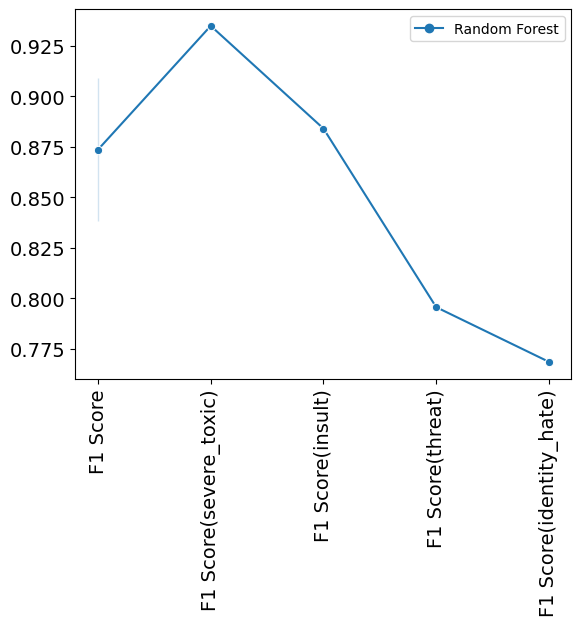

In [54]:
sns.lineplot(data=f1_all_trp,  size=None, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')


In [55]:
data_tox_done.head()

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


# RandomForestClassifier

In [56]:
X = data_tox_done.comment_text
X

6            cocksucker before you piss around on my work
12      hey    what is it       talk   what is it    a...
16      bye    don t look  come or think of comming ba...
42      you are gay or antisemmitian    archangel whit...
43               fuck your filthy mother in the ass  dry 
                              ...                        
5544    electronic intifada is not an activist site  w...
5545    new genre   the new genre supernatural was use...
5547      translated as the second vatican council  a ...
5549    purpose this rfc will be used to determine com...
5550      one need not be a graduate to be an alumnus ...
Name: comment_text, Length: 10000, dtype: object

In [57]:
y = data_tox_done['toxic']
y

6       1
12      1
16      1
42      1
43      1
       ..
5544    0
5545    0
5547    0
5549    0
5550    0
Name: toxic, Length: 10000, dtype: int64

In [58]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)


randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
randomforest

RandomForestClassifier(random_state=42)

# Pickling trained RandomForest models

In [60]:
import pickle

In [61]:
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"pickle//{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"pickle//{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [62]:
datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

for i,j in zip(datalist,label):
    pickle_model(i, j)